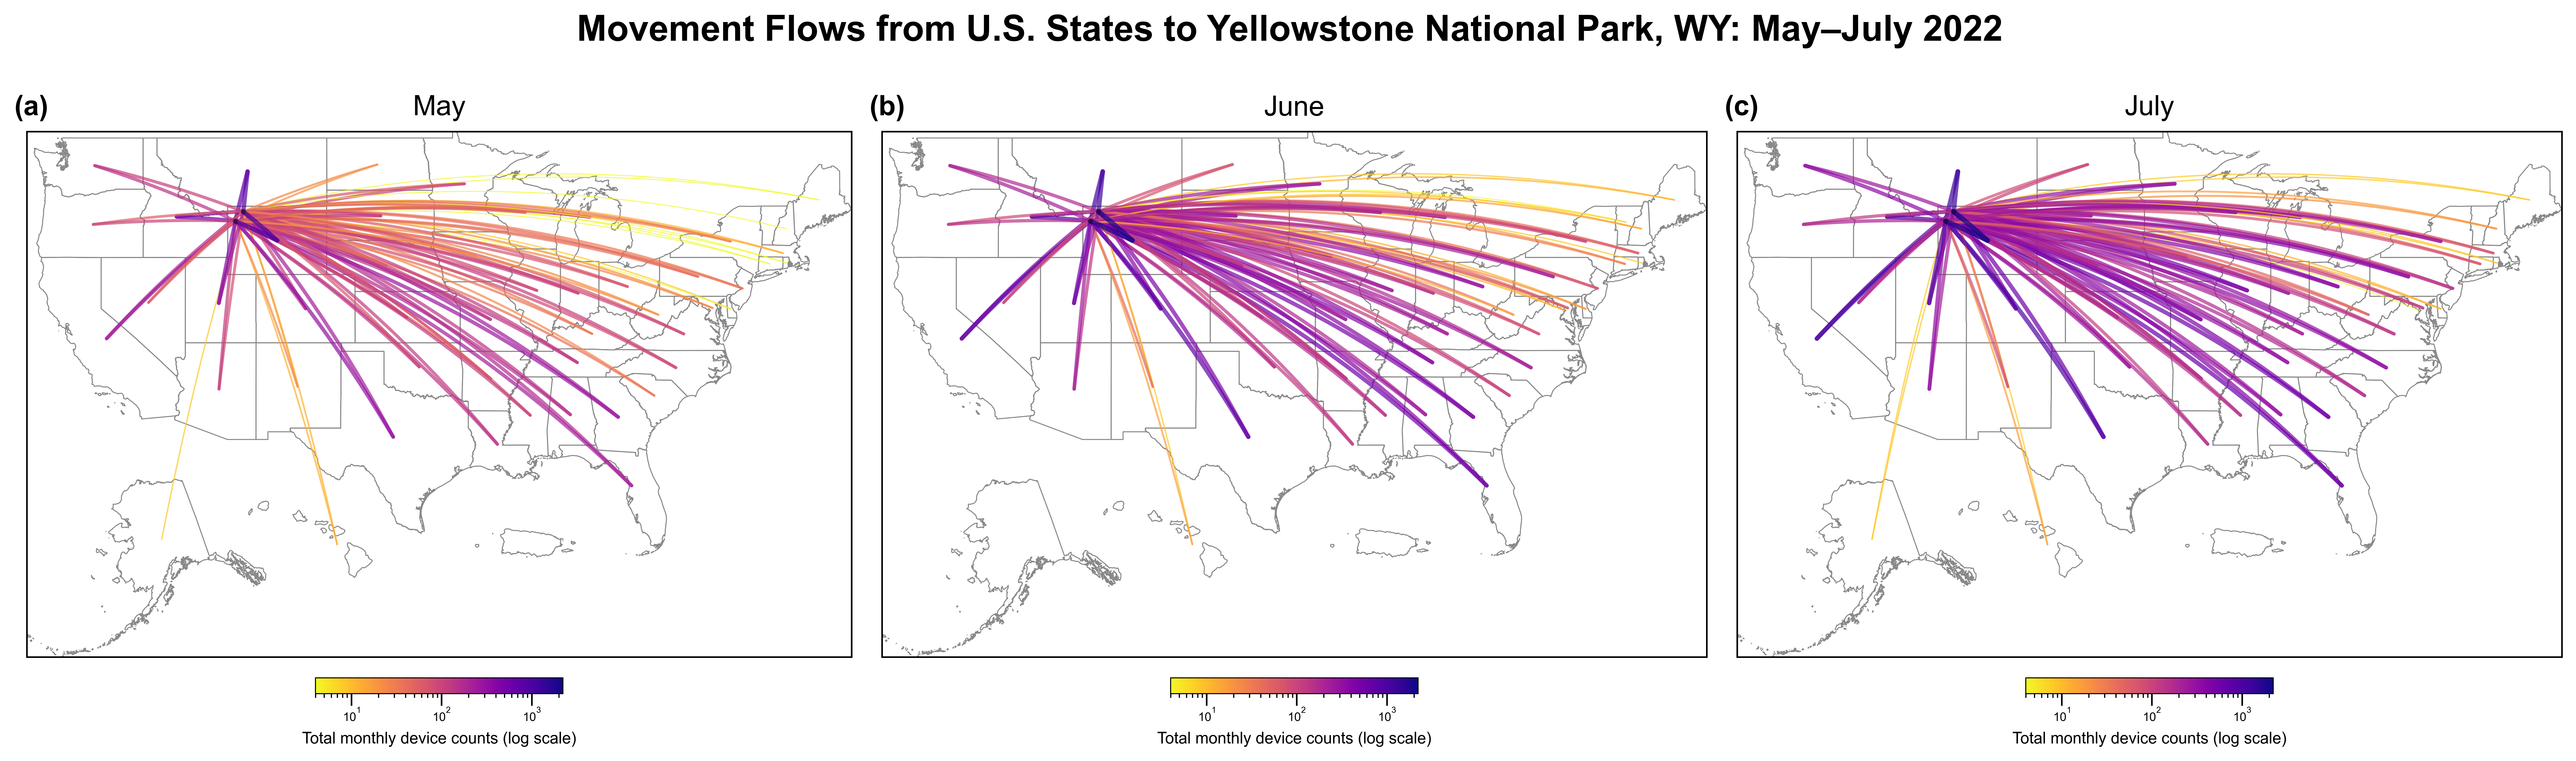

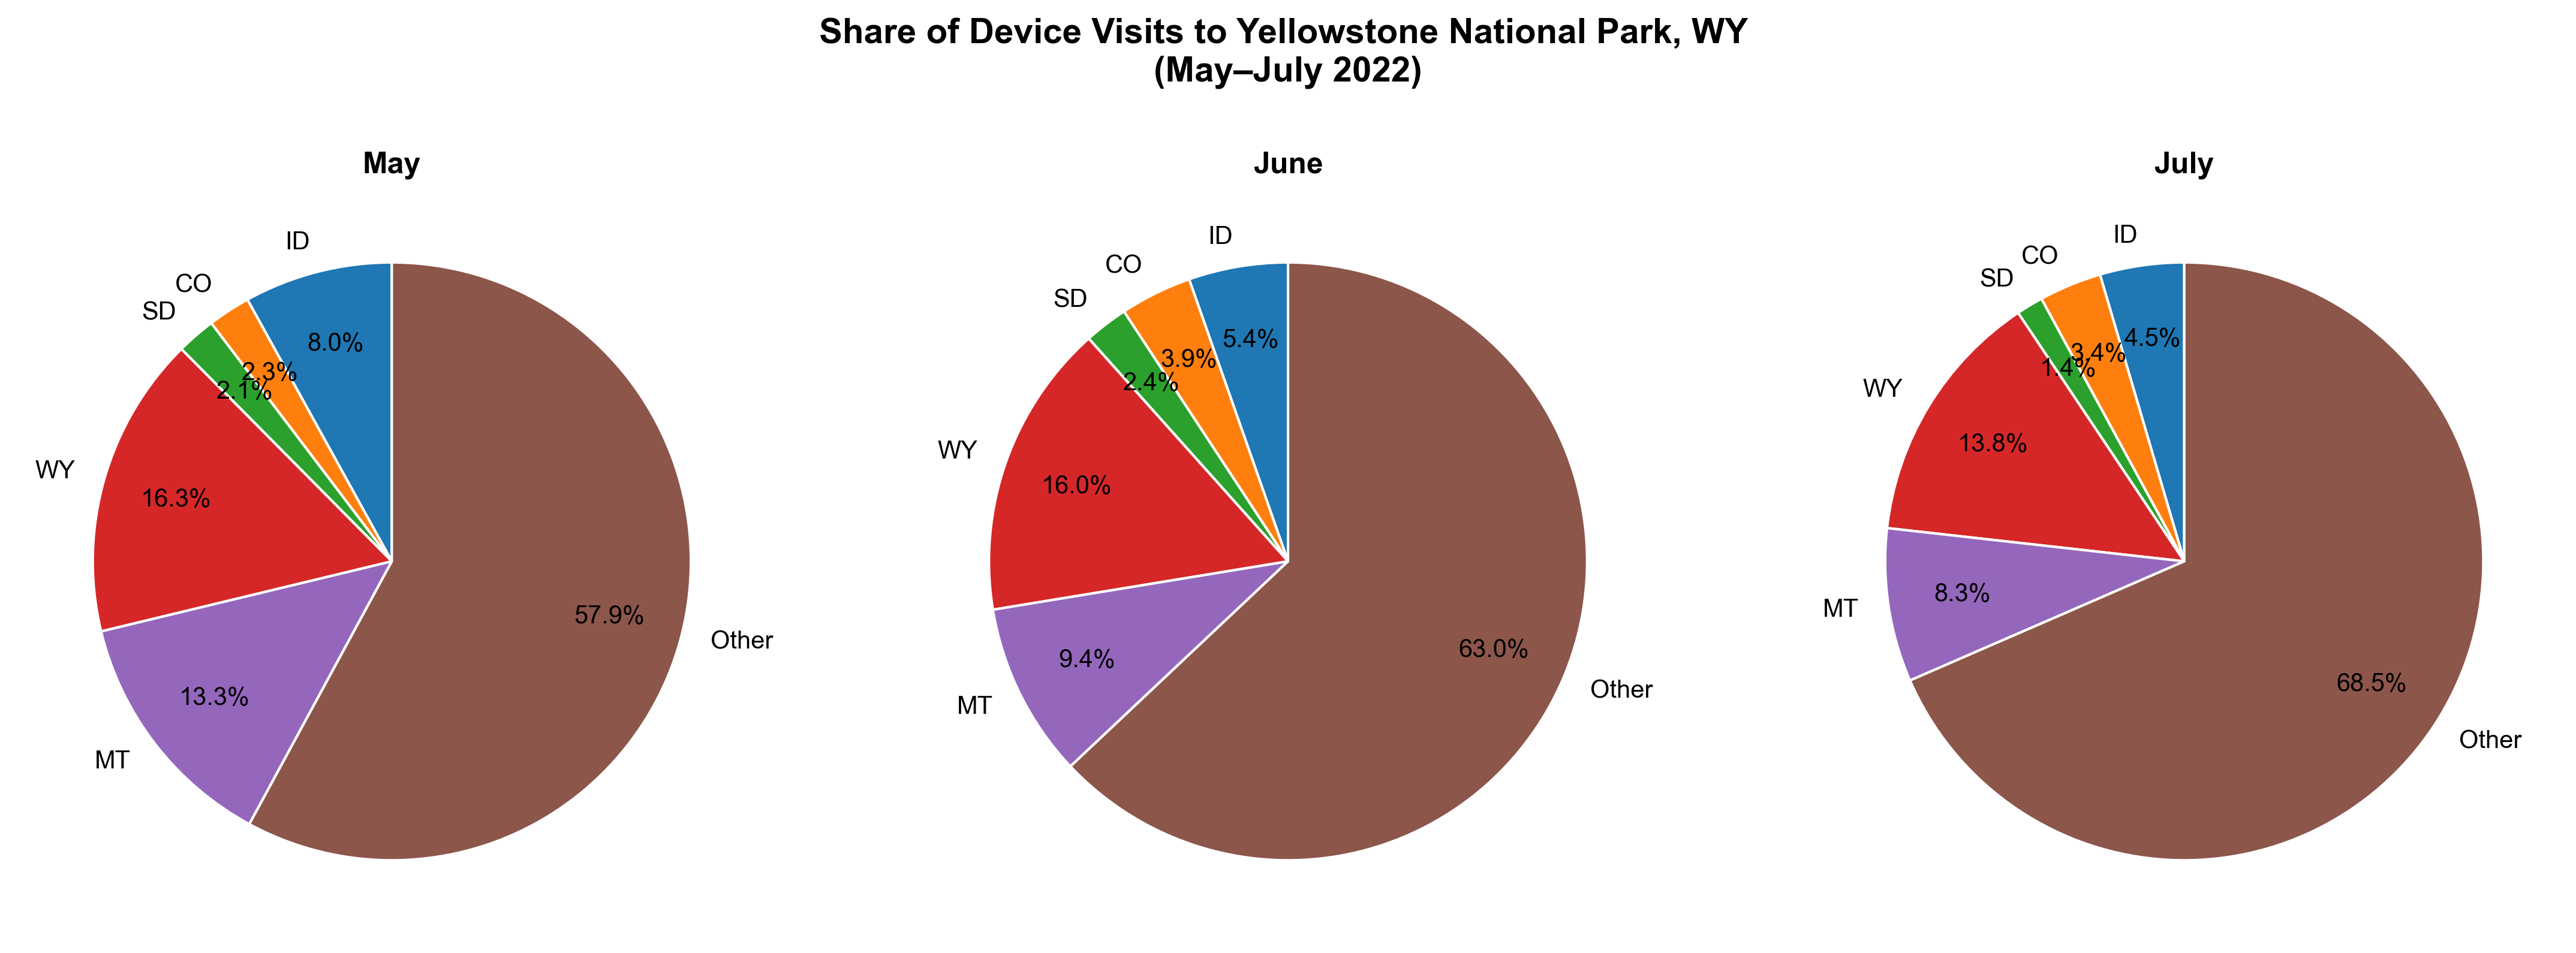

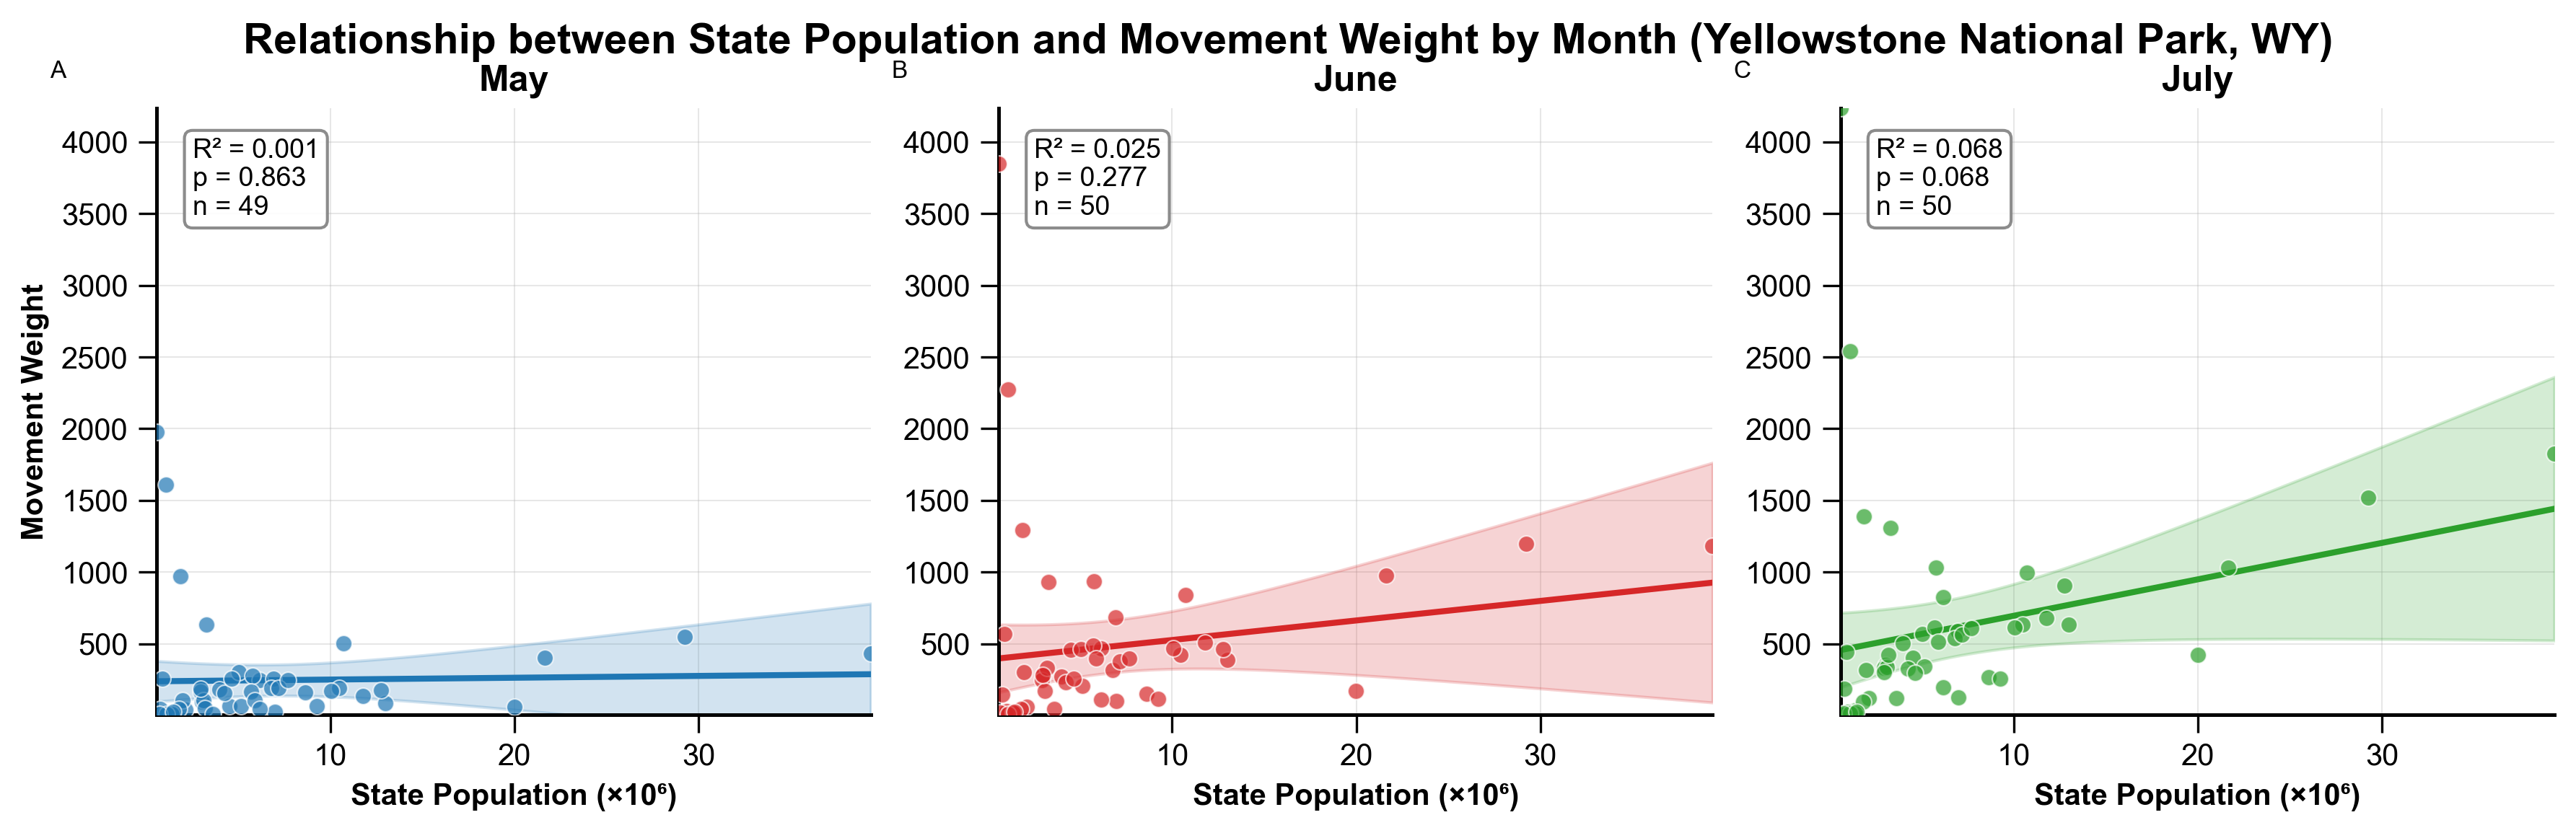

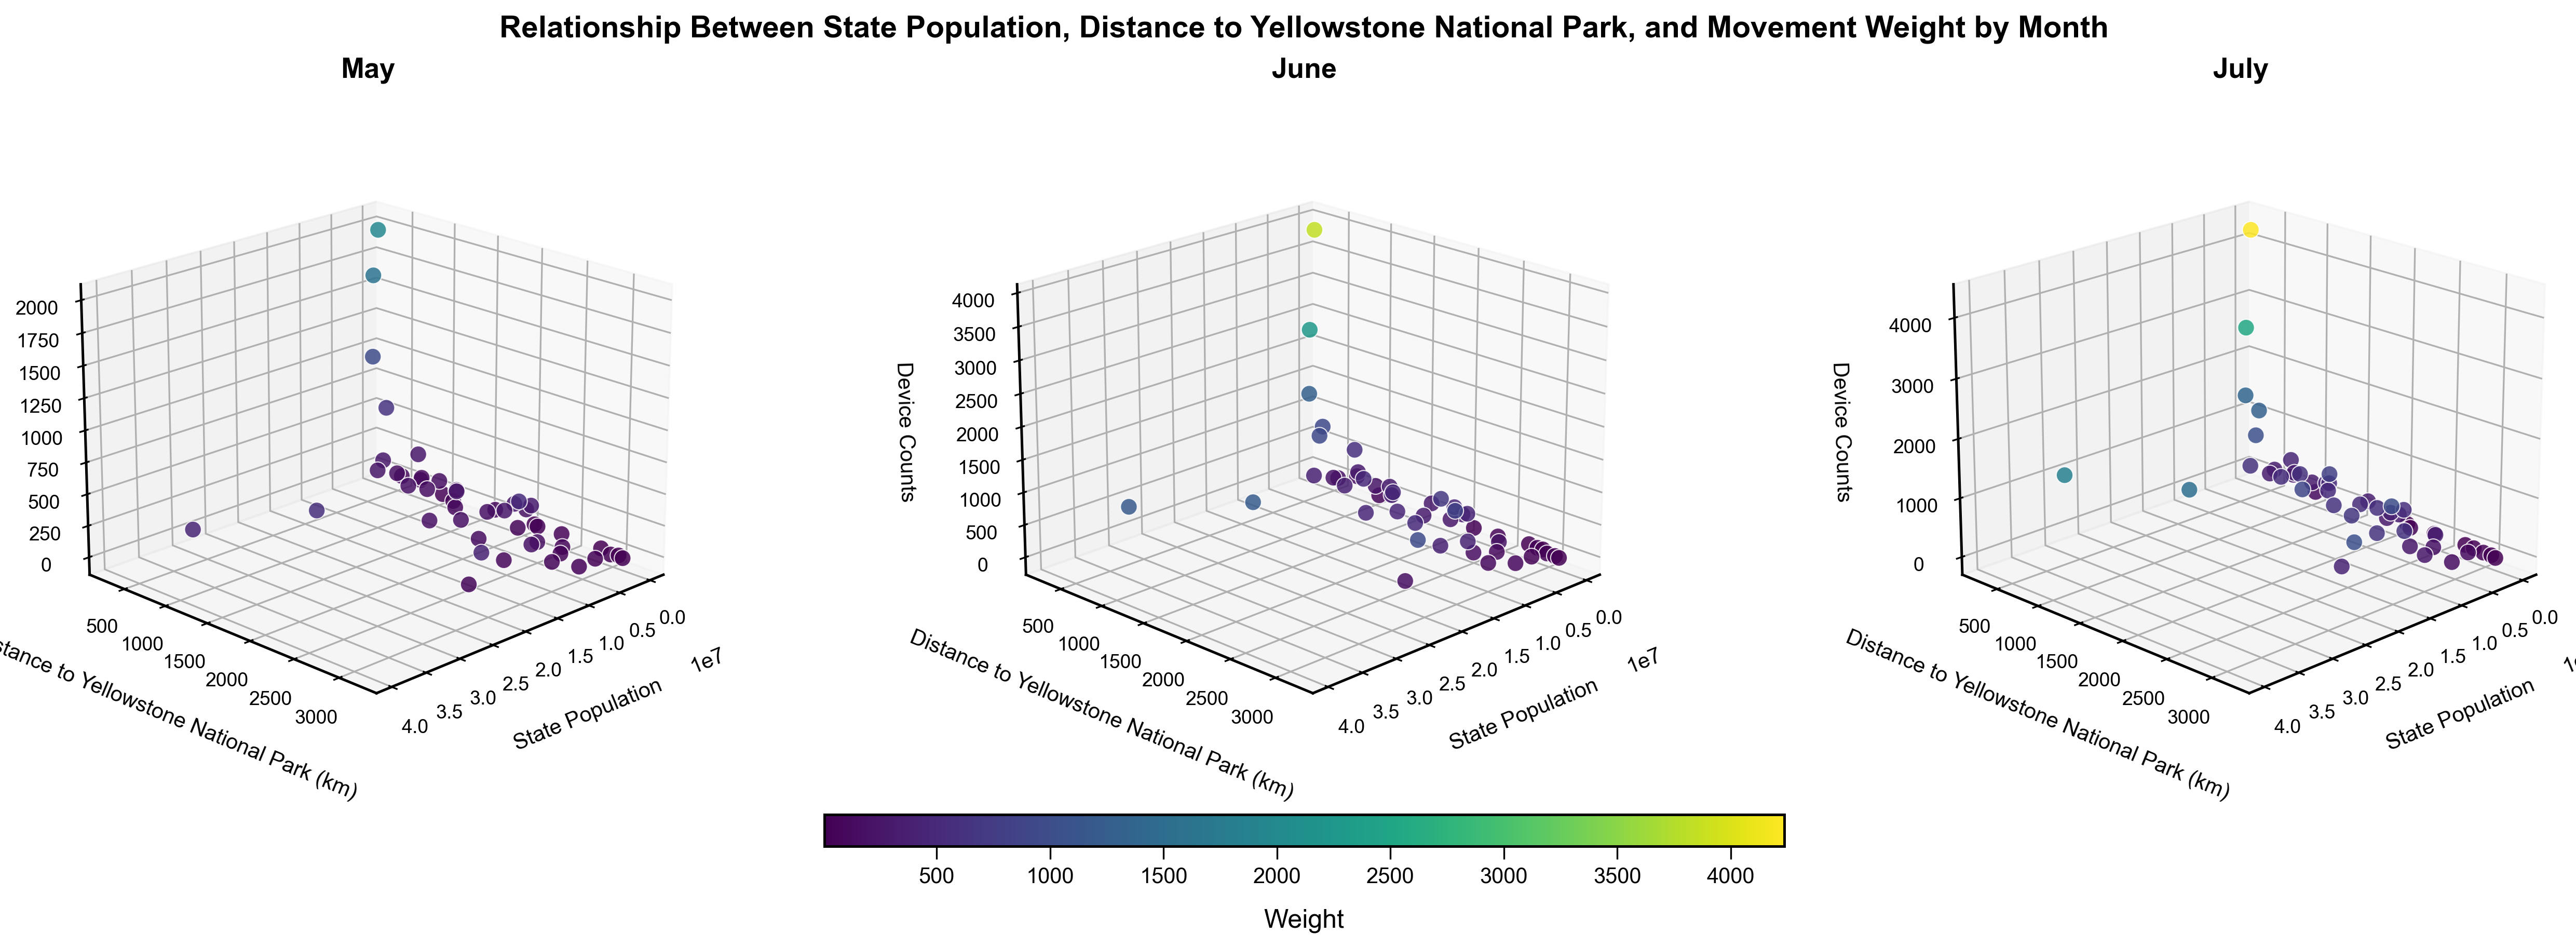

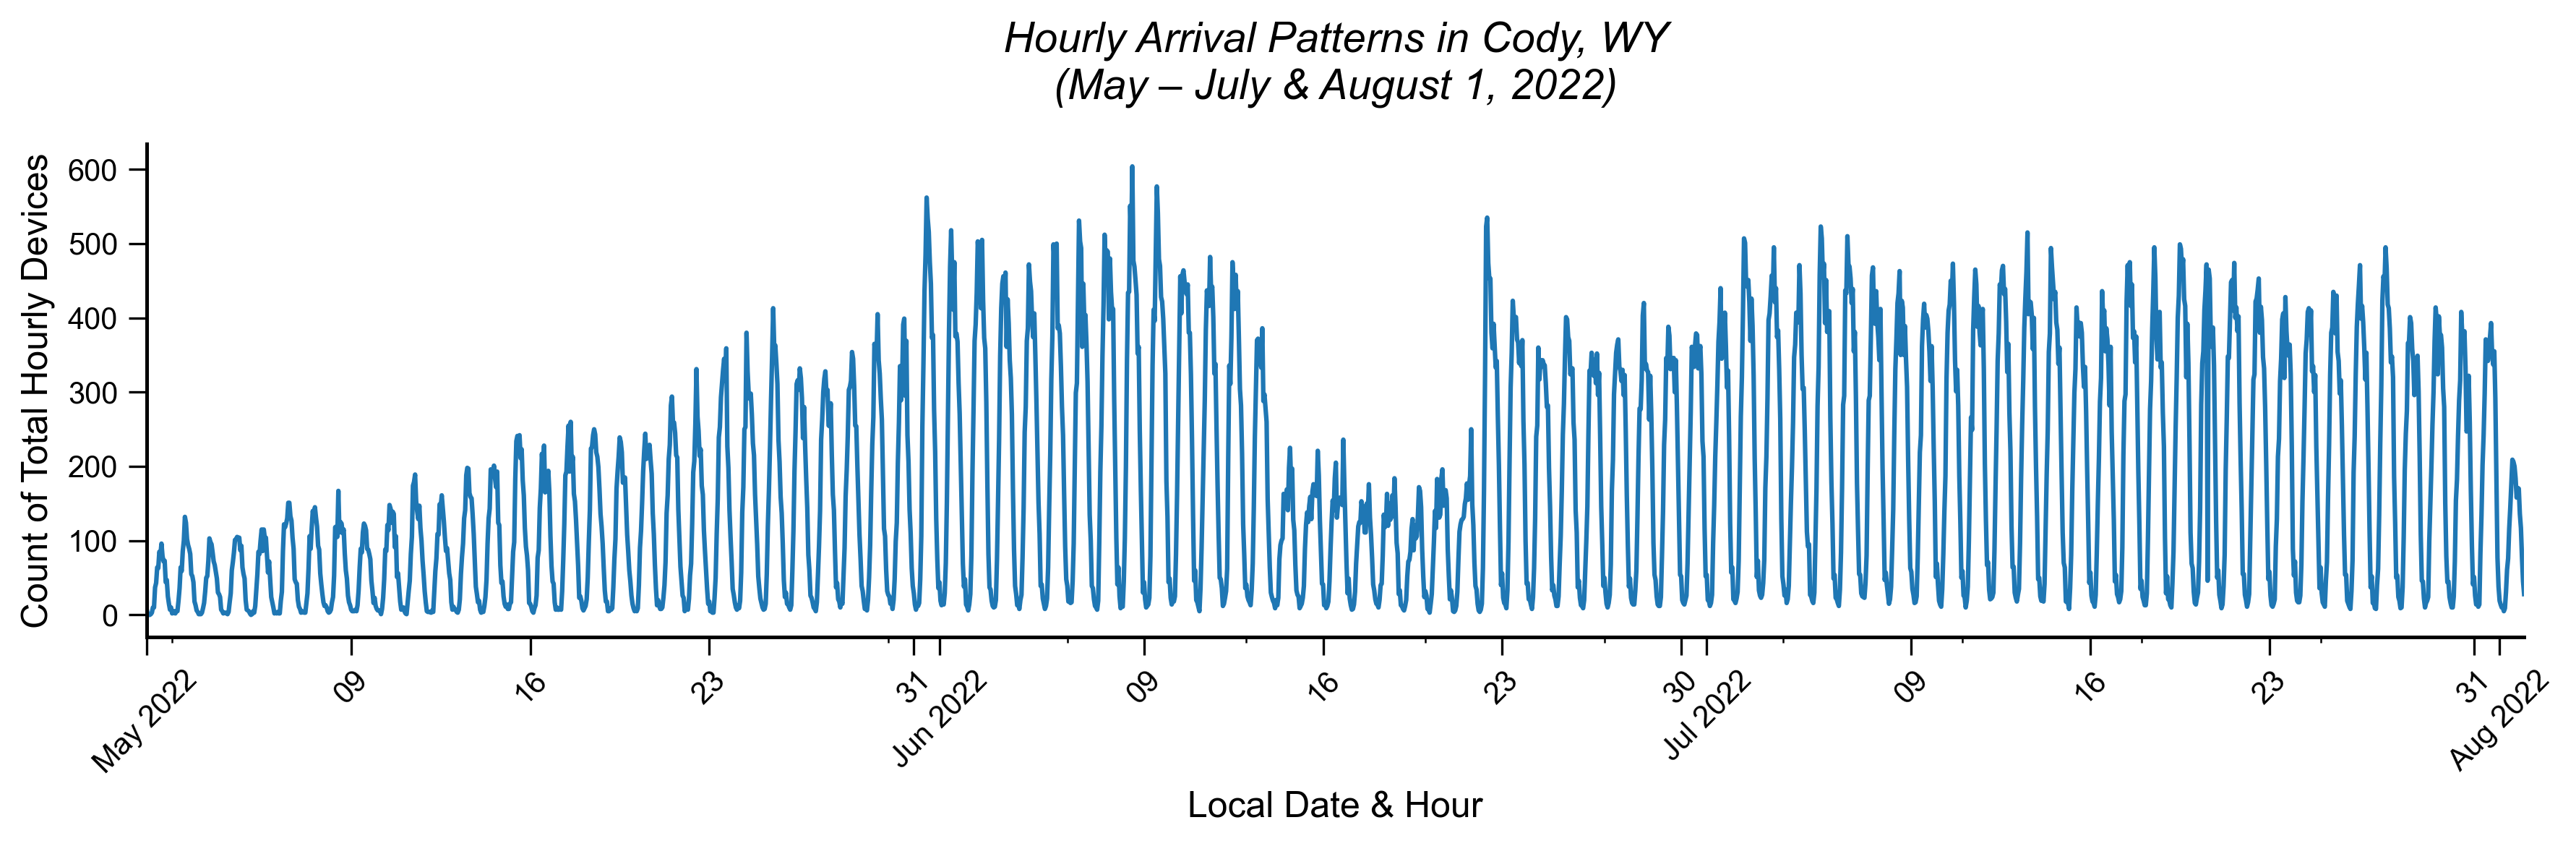

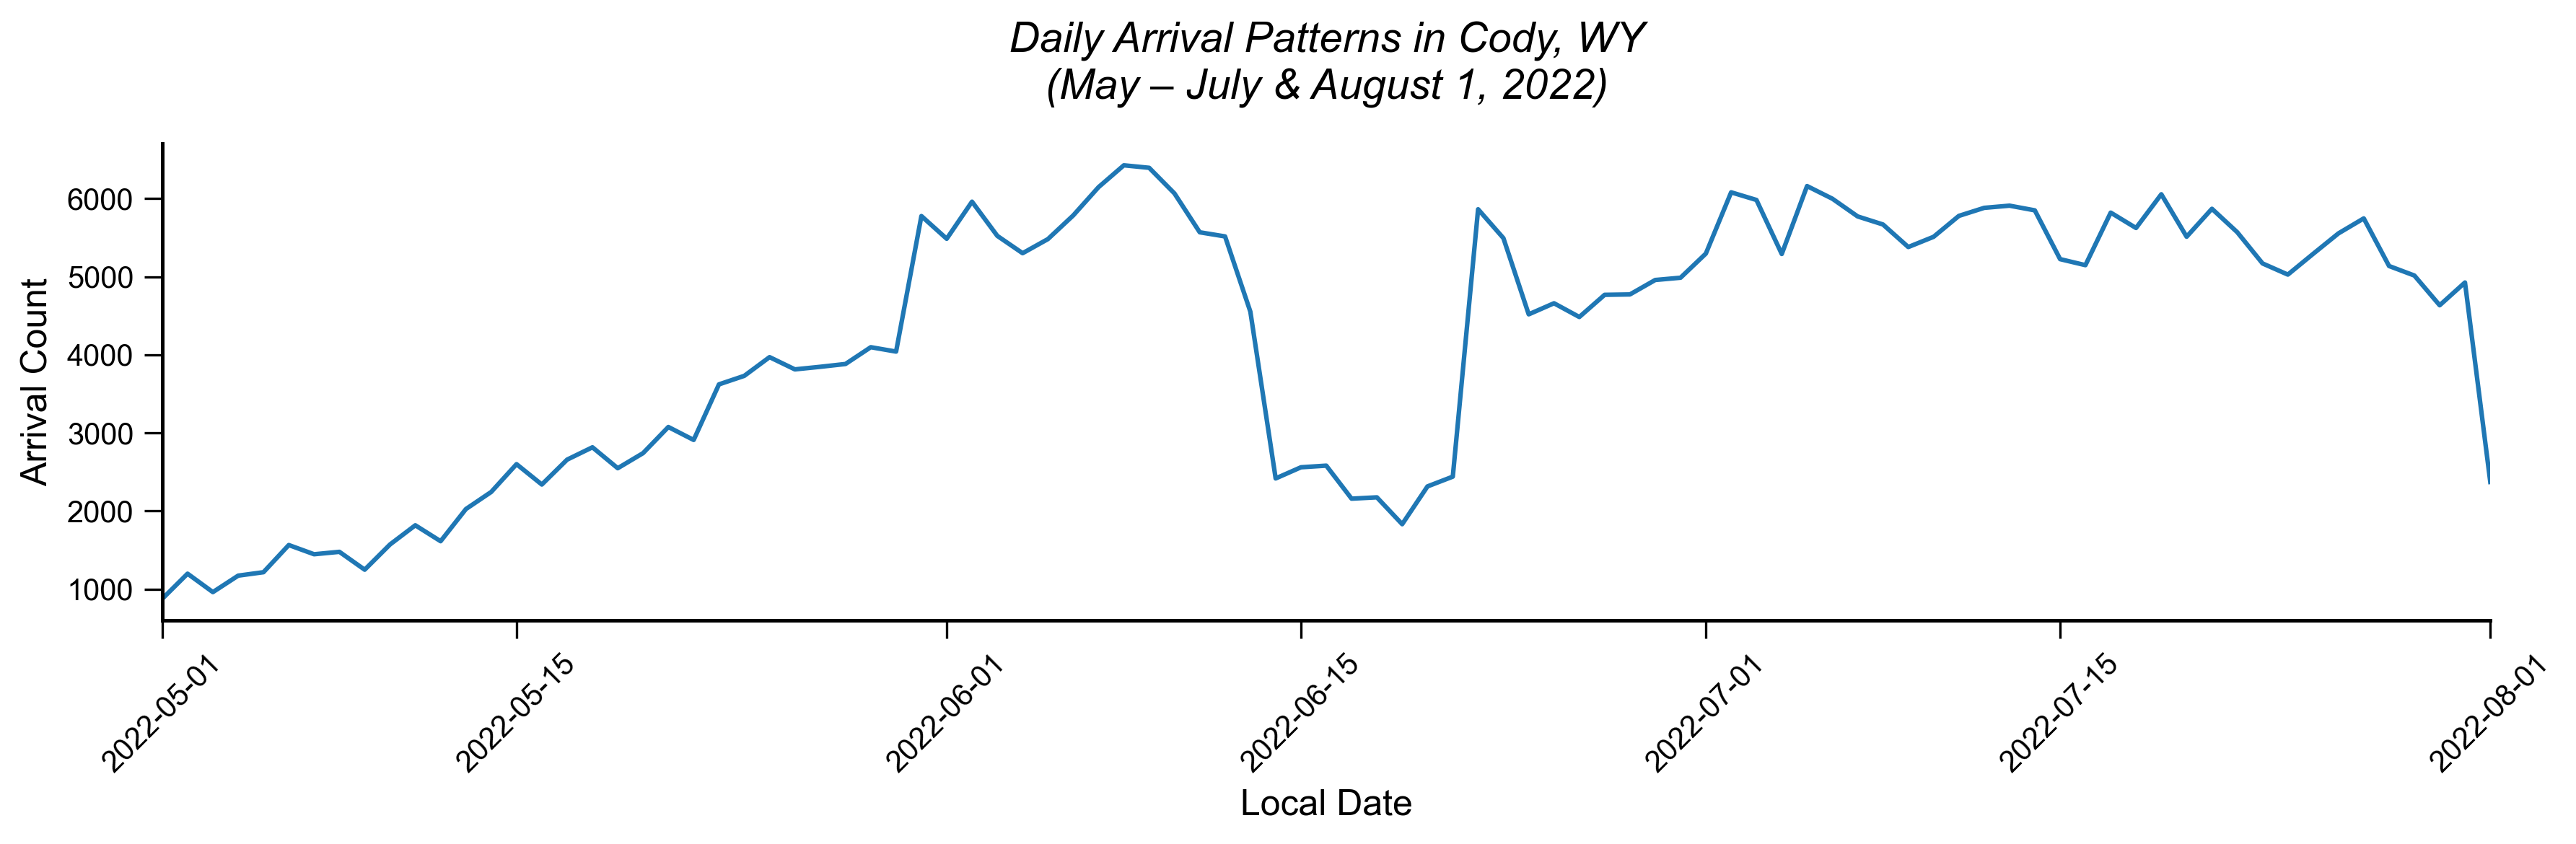

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

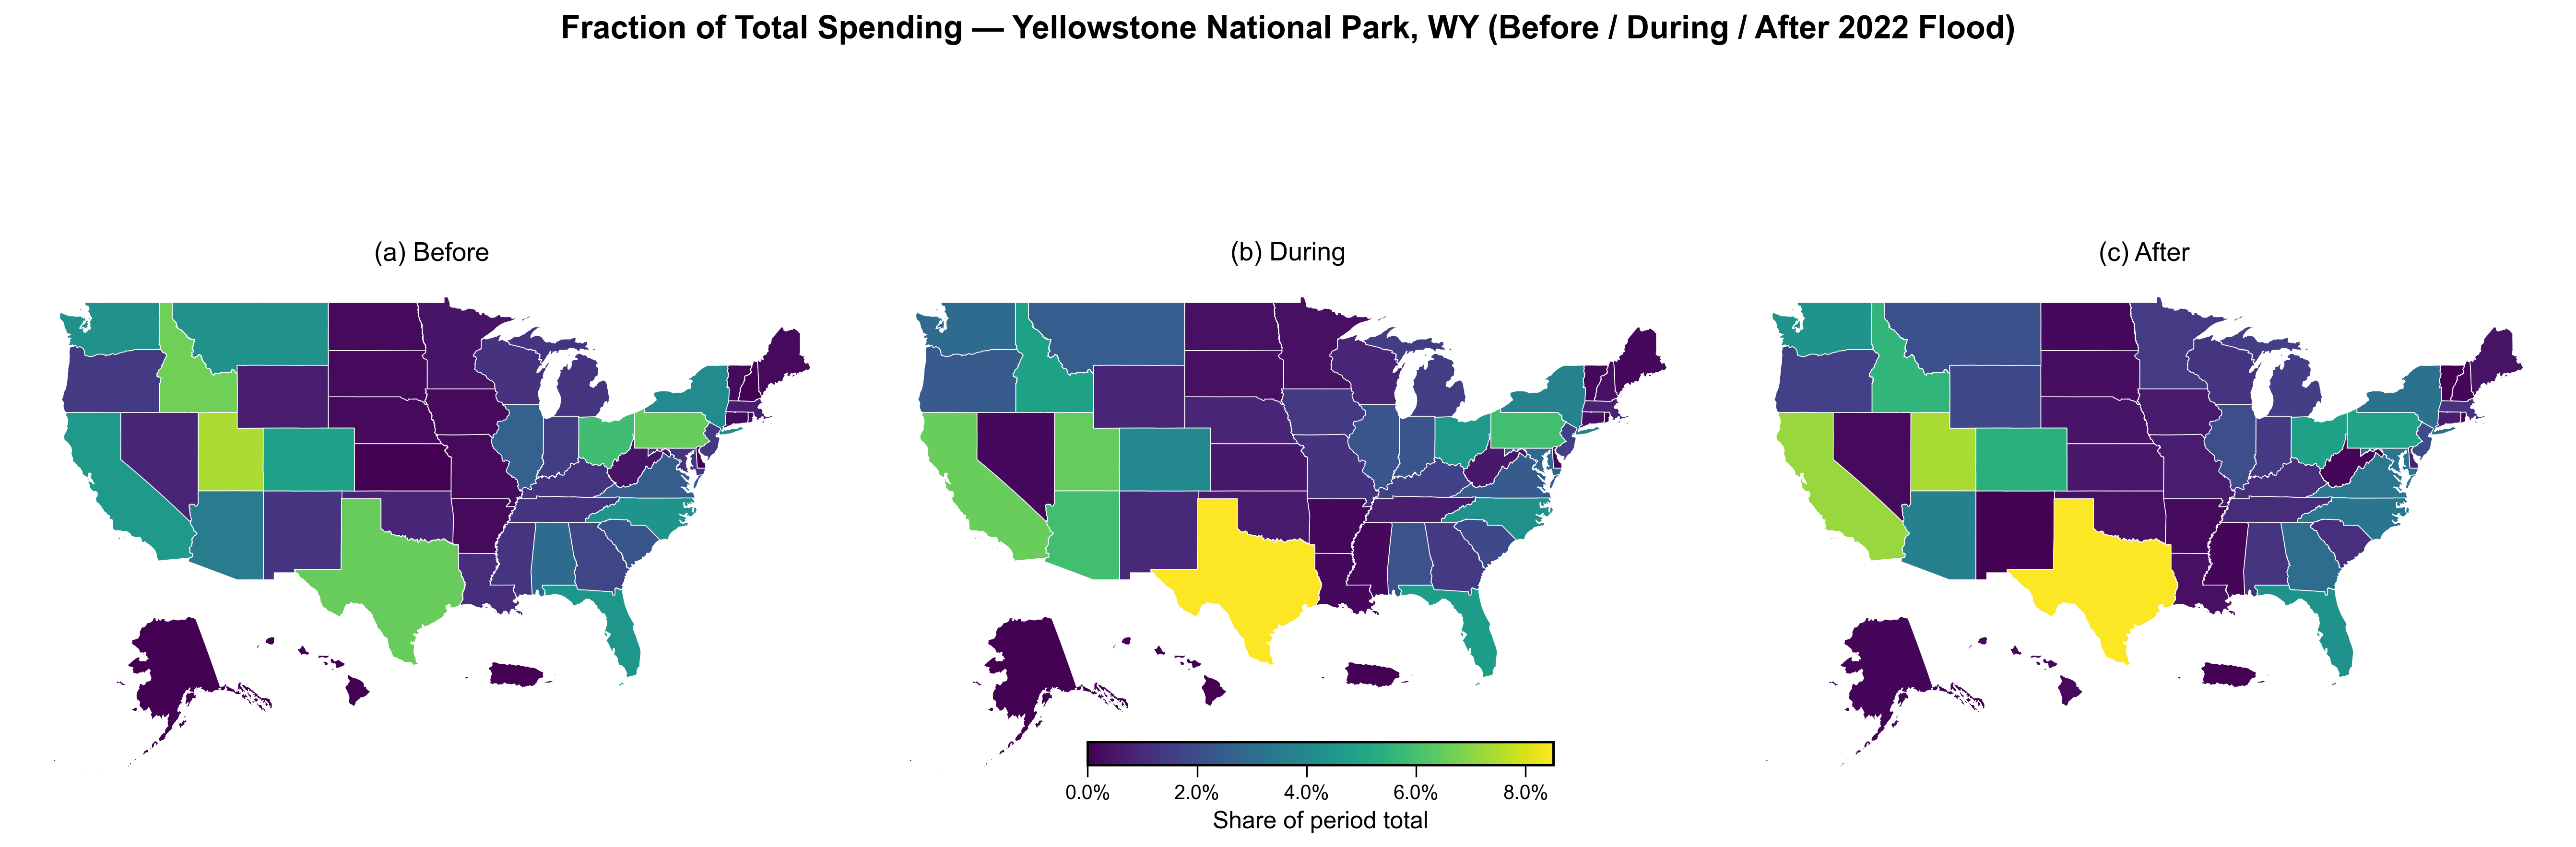

In [4]:
import sys
import geopandas as gpd
import matplotlib.pyplot as plt

# PATH 
sys.path.append(r"F:\Yellow Stone Flood-2022\floodanalysis\Scripts")
import mo as mb 

# Load CBGs (Wyoming + Montana block groups)
wy_mt_cbg = mb.load_blockgroups([mb.SHAPEFILE_WY_CBG, mb.SHAPEFILE_MT_CBG])

# Load mobility data for 2022 (Advan mobility CSVs for WY+MT)
df_2022 = mb.load_advan([mb.ADVAN_CSV_WY, mb.ADVAN_CSV_MT], year=2022)

# Load projected state populations
gdf_proj_states = mb.load_state_pop(mb.STATE_POP_FILE)


# Disable plt.show() only DURING pipeline execution 
_real_show = plt.show
plt.show = lambda *args, **kwargs: None

# RUN MASTER PIPELINE FOR THE PLACE
results = mb.run_full_pipeline_for_place(
    place_name="Yellowstone National Park, USA",
    pretty_label="Yellowstone National Park, WY",
    geoid_prefixes=["56039"],              
    wy_cbg=wy_mt_cbg,
    df_2022=df_2022,
    gdf_proj_states=gdf_proj_states,
    exclude_geoids=['560399676001'],       
    outdir="temp"                          
)

# Delete unwanted figures
if "figs" in results:
    # Block the county-level flow map
    if "county_flow" in results["figs"]:
        plt.close(results["figs"]["county_flow"])

# Restore plt.show() 
plt.show = _real_show

# Hourly arrivals
hourly_fig, _ = mb.plot_hourly_series(results["hourly_series"], "Cody, WY")
plt.show()
plt.close(hourly_fig)

# Daily arrivals
daily_fig, _ = mb.plot_daily_series(results["daily_series"], "Cody, WY")
plt.show()
plt.close(daily_fig)

# County-level flow map 
if "figs" in results and "county_flow" in results["figs"]:
    plt.close(results["figs"]["county_flow"])

# State-level flow map 
if "figs" in results and "state_flow" in results["figs"]:
    fig_state = results["figs"]["state_flow"]
    plt.figure(fig_state.number)
    plt.show()
    plt.close(fig_state)


# Regression panel
if "figs" in results and "regression" in results["figs"]:
    fig_reg = results["figs"]["regression"]
    plt.figure(fig_reg.number)
    plt.show()
    plt.close(fig_reg)

# 3D scatter 
if "figs" in results and "scatter3d" in results["figs"]:
    fig_3d = results["figs"]["scatter3d"]
    plt.figure(fig_3d.number)
    plt.show()
    plt.close(fig_3d)



# BUILD STATE-ORIGIN CHOROPLETHS
us_states = gpd.read_file(mb.US_STATES_FILE).to_crs(epsg=4326)

# Normalize STATEFP to 2-digit strings and drop territories 
us_states["STATEFP"] = us_states["STATEFP"].astype(str).str.zfill(2)
us_states = us_states[~us_states["STATEFP"].isin(["60", "66", "69", "78"])].copy()

# Run origin-state analyzer
result_origin = mb.analyze_state_origin_for_place(
    csv_path=r"F:\Yellow Stone Flood-2022\floodanalysis\Data\CSV Origin\Yellowstone National Park_State_of_Orign.csv",
    us_states_gdf=us_states,
    place_label="Yellowstone National Park, WY",
    as_fraction=True,
    save_fig_path=None,            
)

# Show choropleth panels 
plt.show()
plt.close(result_origin["fig"])


In [5]:
# import sys
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # PATH 
# sys.path.append(r"F:\Yellow Stone Flood-2022\floodanalysis\Scripts")
# import mo as mb 

# # Load CBGs (Wyoming + Montana block groups)
# wy_mt_cbg = mb.load_blockgroups([mb.SHAPEFILE_WY_CBG, mb.SHAPEFILE_MT_CBG])

# # Load mobility data for 2022 (Advan mobility CSVs for WY+MT)
# df_2022 = mb.load_advan([mb.ADVAN_CSV_WY, mb.ADVAN_CSV_MT], year=2022)

# # Load projected state populations
# gdf_proj_states = mb.load_state_pop(mb.STATE_POP_FILE)

# # RUN MASTER PIPELINE FOR THE PLACE
# results = mb.run_full_pipeline_for_place(
#     place_name="Yellowstone National Park, USA",
#     pretty_label="Yellowstone National Park, WY",
#     geoid_prefixes=["56039"],              
#     wy_cbg=wy_mt_cbg,
#     df_2022=df_2022,
#     gdf_proj_states=gdf_proj_states,
#     exclude_geoids=['560399676001'],       
#     outdir="temp"                          
# )

# del wy_mt_cbg
# del df_2022
# del gdf_proj_states

# # Hourly arrivals
# hourly_fig, _ = mb.plot_hourly_series(results["hourly_series"], "Cody, WY")
# plt.show()
# plt.close(hourly_fig)

# # Daily arrivals
# daily_fig, _ = mb.plot_daily_series(results["daily_series"], "Cody, WY")
# plt.show()
# plt.close(daily_fig)

# # County-level flow map
# fig_county = results["figs"]["county_flow"]
# plt.figure(fig_county.number)
# plt.show()
# plt.close(fig_county)

# # State-level flow map
# fig_state = results["figs"]["state_flow"]
# plt.figure(fig_state.number)
# plt.show()
# plt.close(fig_state)

# # # Pie chart
# # fig_pie = results["figs"]["pie"]
# # plt.figure(fig_pie.number)
# # plt.show()
# # plt.close(fig_pie)

# # Regression panel(s)
# fig_reg = results["figs"]["regression"]
# plt.figure(fig_reg.number)
# plt.show()
# plt.close(fig_reg)

# # 3D scatter (matplotlib 3D Axes)
# fig_3d = results["figs"]["scatter3d"]
# plt.figure(fig_3d.number)
# plt.show()
# plt.close(fig_3d)
# del results["figs"]

# # BUILD STATE-ORIGIN CHOROPLETHS

# us_states = gpd.read_file(mb.US_STATES_FILE).to_crs(epsg=4326)

# # Normalize STATEFP to 2-digit strings and drop territories 
# us_states["STATEFP"] = us_states["STATEFP"].astype(str).str.zfill(2)
# us_states = us_states[~us_states["STATEFP"].isin(["60", "66", "69", "78"])].copy()

# # Run your origin-state analyzer
# result_origin = mb.analyze_state_origin_for_place(
#     csv_path=r"F:\Yellow Stone Flood-2022\floodanalysis\Data\CSV Origin\Yellowstone National Park_State_of_Orign.csv",
#     us_states_gdf=us_states,
#     place_label="Yellowstone National Park, WY",
#     as_fraction=True,
#     save_fig_path=None,            
# )

# # Show choropleth panels
# plt.show()
# plt.close(result_origin["fig"])

# del result_origin
# del us_states

# # Safely delete large keys if present
# for k in ["hourly_series", "daily_series", "county_table", "state_table"]:
#     if k in results:
#         del results[k]

# # Final memory trim
# del results
